## Random_OverSampling with Smoothing

Random over-sampling consists in extracting random samples from the minority class, until they reach a certain proportion compared to the majority class, typically 50:50, or in other words, a balancing ratio of 1.

- balancing ratio = (no. of observations in minority class / no. of observations in majority class)

In Random over-sampling, we extract samples from the minority class at random, with replacement.

In order not to DUPLICATE the data, after extracting the samples at random, we multiply the value of the sample by a number that contemplates the dispersion of the data, to obtain artificial examples.

**For this functionality, make sure you have imbalanced-learn version 0.8.0 or bigger installed.**

In [33]:
# import libraries

import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn 
from sklearn.datasets import make_blobs

# from imblearn
from imblearn.over_sampling import RandomOverSampler

In [34]:
# creating toy dataset for binary classification

X, y = make_blobs(n_samples=1600, n_features=2, centers=[(0,0),(5,5)], random_state= 42,  cluster_std=1.5)

X.shape, y.shape

((1600, 2), (1600,))

In [8]:
X[y ==1].sample(200)

,varA,varB
562,2.981194,3.771113
780,5.057357,2.827113
669,6.069068,2.175275
610,5.802226,6.843471
1489,5.189569,7.908393
...,...,...
103,5.061379,3.496719
838,3.565345,5.708609
571,3.567316,5.635399
639,5.247141,5.076332


In [35]:
# creating a data frame 

X = pd.DataFrame(data = X, columns = ['varA', 'varB'])
y = pd.Series(y)

# now, under sample the data for y ==1 
X = pd.concat([X[y == 0], X[y==1].sample(200, random_state=42)], axis = 0)

y = y.loc[X.index]

# display the shape
X.shape, y.shape

((1000, 2), (1000,))

In [36]:
# check the value counts for the target class
y.value_counts()

0    800
1    200
dtype: int64

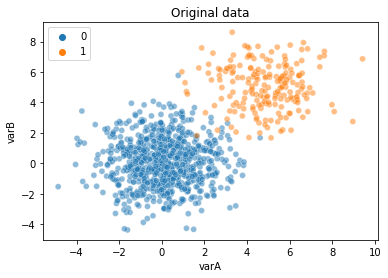

In [37]:
# plot the original data

sns.scatterplot(data = X, x = 'varA', y = 'varB', hue = y, alpha=0.5)
plt.title('Original data')
plt.show()

## Random Over-sampling with Smoothing

- Lets try with different shrinkage values

Resampled Data Shapes : 
(1600, 2) (1600,)
Value Counts :
0    800
1    800
dtype: int64


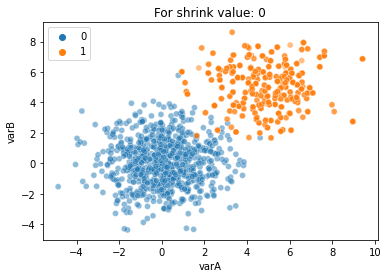

Resampled Data Shapes : 
(1600, 2) (1600,)
Value Counts :
0    800
1    800
dtype: int64


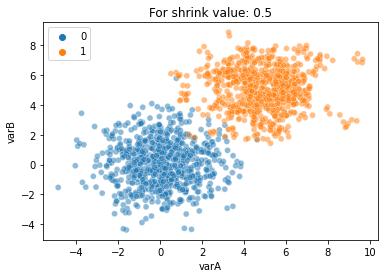

Resampled Data Shapes : 
(1600, 2) (1600,)
Value Counts :
0    800
1    800
dtype: int64


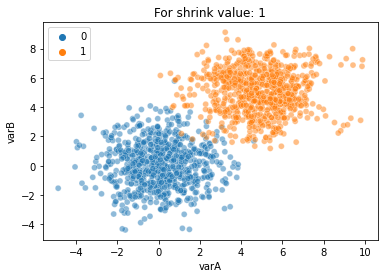

Resampled Data Shapes : 
(1600, 2) (1600,)
Value Counts :
0    800
1    800
dtype: int64


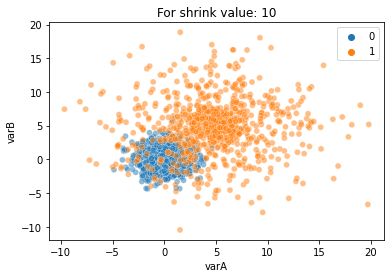

In [39]:
# create RandomSampler object
for shrink in [0,0.5,1,10]:
    ros = RandomOverSampler(sampling_strategy='auto', # samples from the minority class-- this is default
                            random_state=0,
                           shrinkage=shrink) 

    X_resampled, y_resampled = ros.fit_resample(X,y)
    print('Resampled Data Shapes : ')
    print(X_resampled.shape, y_resampled.shape)
    print('Value Counts :')
    print(y_resampled.value_counts())
    
    sns.scatterplot(data = X_resampled, x = 'varA', y = 'varB', hue = y_resampled, alpha=0.5)
    plt.title('For shrink value: {}'.format(shrink))
    plt.show()    

- Here we can see, the bigger the shrinkage value is, the resampled minority observations spread more.
- So, it is very crucial in deciding this shrinkage value
- This is an arbitrary value and there is no as such rule for setting up this value, will need to run and check few values to find the optimum one

## Multi Class Data

In [40]:
# create a multi class dataset

X, y = make_blobs(n_samples=1600,
           n_features=3,
           cluster_std=1.5,
           centers=[(0,0),(5,5),(-1,5)],
           random_state=42)

X.shape, y.shape

((1600, 2), (1600,))

In [41]:
# convert into a DataFrame and series
X = pd.DataFrame(data = X, columns = ['varA', 'varB'])
y = pd.Series(y)

# concat
X = pd.concat([X[y==0],
             X[y==1].sample(100, random_state=42),
             X[y==2].sample(100, random_state=42)],
             axis = 0)
y = y.loc[X.index]

X.shape, y.shape

((734, 2), (734,))

In [42]:
y.value_counts()

0    534
1    100
2    100
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

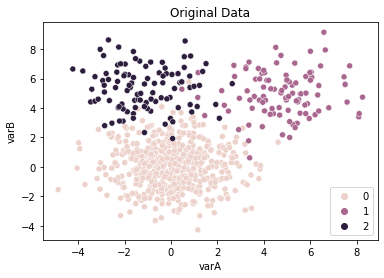

In [43]:
# plot

sns.scatterplot(data = X, x = 'varA', y ='varB', hue = y)
plt.title('Original Data')
plt.show

Resampled Data Shapes : 
(1602, 2) (1602,)
Value Counts :
0    534
1    534
2    534
dtype: int64


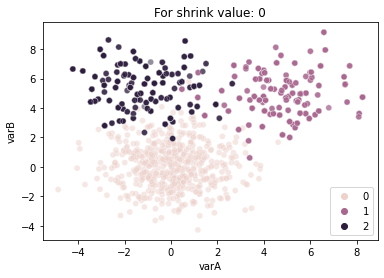

Resampled Data Shapes : 
(1602, 2) (1602,)
Value Counts :
0    534
1    534
2    534
dtype: int64


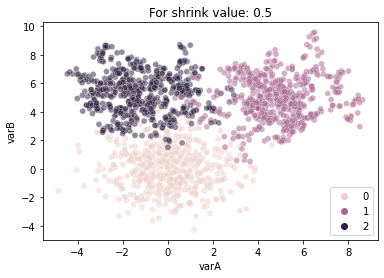

Resampled Data Shapes : 
(1602, 2) (1602,)
Value Counts :
0    534
1    534
2    534
dtype: int64


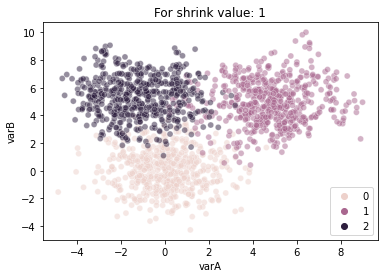

Resampled Data Shapes : 
(1602, 2) (1602,)
Value Counts :
0    534
1    534
2    534
dtype: int64


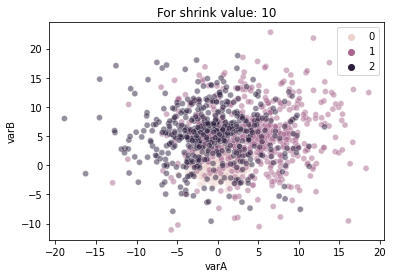

In [44]:
## Perform Random Oversampling

# create RandomSampler object
for shrink in [0,0.5,1,10]:
    ros = RandomOverSampler(sampling_strategy='not majority', # samples from all class except the majority one
                            random_state=0,
                           shrinkage=shrink) 

    X_resampled, y_resampled = ros.fit_resample(X,y)
    print('Resampled Data Shapes : ')
    print(X_resampled.shape, y_resampled.shape)
    print('Value Counts :')
    print(y_resampled.value_counts())
    
    sns.scatterplot(data = X_resampled, x = 'varA', y = 'varB', hue = y_resampled, alpha=0.5)
    plt.title('For shrink value: {}'.format(shrink))
    plt.show()   

Resampled Data Shapes : 
(1534, 2) (1534,)
Value Counts :
0    534
1    500
2    500
dtype: int64


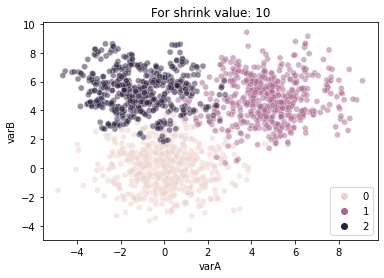

In [45]:
## Passing the shrinkage value in a different way

# create RandomSampler object

ros = RandomOverSampler(sampling_strategy={1:500, 2:500}, # can specify this way as
                        random_state=0,
                       shrinkage={1:1, 2:0.5})  # setting shrinkage values as per classes

X_resampled, y_resampled = ros.fit_resample(X,y)
print('Resampled Data Shapes : ')
print(X_resampled.shape, y_resampled.shape)
print('Value Counts :')
print(y_resampled.value_counts())

sns.scatterplot(data = X_resampled, x = 'varA', y = 'varB', hue = y_resampled, alpha=0.5)
plt.title('For shrink value: {}'.format(shrink))
plt.show()   